In [46]:
import numpy as np
import agent_journal
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
def find_file(mydir, fileroot):
    files = []
    for root, dirs, files in os.walk(mydir):
        for file in files:
            if file.endswith(fileroot):
                files.append(os.path.join(root, file))
    return np.array(files)

In [57]:
Ns = [500,1000,2000,10000]
pers = [3,4,5]

In [59]:
toload = [["run_results/N=" + str(xx) + "_per=" + str(yy) + "_2.npy" for yy in pers] for xx in Ns]
data = np.array([[np.load(dat) for dat in nn] for nn in toload])

In [60]:
print(data[0].shape) 
# last axis is majors, so 0 will be no majors, second axis of data is the periods
class_sizes = [i*10 + 10 for i in range(10)]

(3, 1, 1, 10, 4)


In [68]:
class_sizes[2]

30

In [62]:
mj = ["NA", 100, 250, 500]
majors = ["major size is: " + str(xx) for xx in mj]
majors

['major size is: NA',
 'major size is: 100',
 'major size is: 250',
 'major size is: 500']

In [63]:
# from pre2016
parula = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

<Figure size 432x288 with 0 Axes>

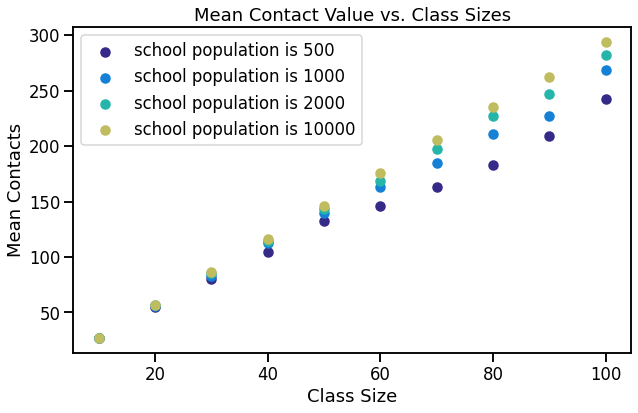

In [65]:
plt.clf()
sns.set_context("talk")
plt.figure(figsize = (10,6))
for N in range(len(Ns)):
    plt.scatter(class_sizes, data[N][0,0,:,0], 
                label = "school population is " + str(Ns[N]), color = parula[N*15])
    
plt.ylabel("Mean Contacts")
plt.xlabel("Class Size")
plt.title("Mean Contact Value vs. Class Sizes")
plt.legend()
#plt.savefig("06_size_vcontacts.png")
plt.show()

In [55]:
points = [">", ".", "s"]

<Figure size 432x288 with 0 Axes>

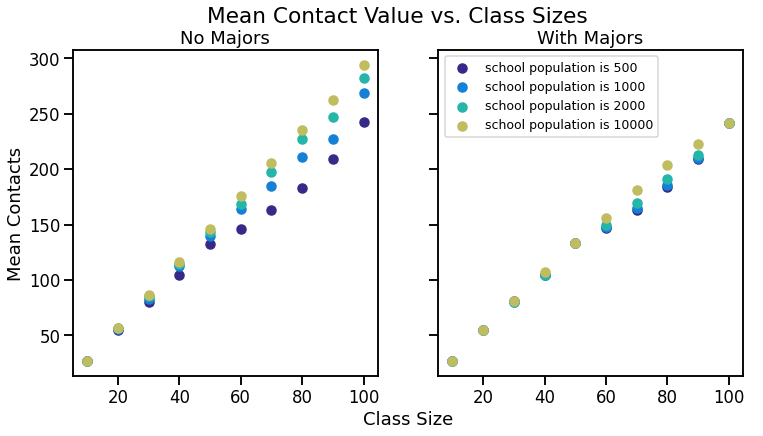

In [74]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12,6), sharex = True, sharey = True)
for N in range(len(Ns)):
    ax1.scatter(class_sizes, data[N][0,0,0,:,0], 
                label = "school population is " + str(Ns[N]), color = parula[N*15])
    ax2.scatter(class_sizes, data[N][0,0,0,:,-1], 
                label = "school population is " + str(Ns[N]), color = parula[N*15])
        
    
# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Class Size")
ax1.set_ylabel("Mean Contacts")
ax1.set_title("No Majors")
ax2.set_title("With Majors")


f.suptitle("Mean Contact Value vs. Class Sizes")
ax2.legend(fontsize = 'x-small')
plt.savefig("08_size_vcontacts.png")
plt.show()

<Figure size 432x288 with 0 Axes>

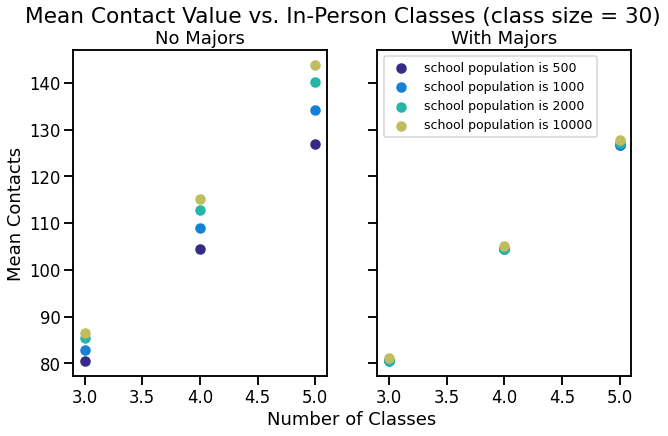

In [78]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,6), sharex = True, sharey = True)
for N in range(len(Ns)):
    ax1.scatter(pers, data[N][:,0,0,2,0], 
                label = "school population is " + str(Ns[N]), color = parula[N*15])
    ax2.scatter(pers, data[N][:,0,0,2,-1], 
                label = "school population is " + str(Ns[N]), color = parula[N*15])
        
    
# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Number of Classes")
ax1.set_ylabel("Mean Contacts")
ax1.set_title("No Majors")
ax2.set_title("With Majors")

f.suptitle("Mean Contact Value vs. In-Person Classes (class size = 30)")
ax2.legend(fontsize = 'x-small', loc = 2)
plt.savefig("09_per_vcontacts.png")
plt.show()